In [1]:
from sequenzo import *
import pandas as pd

## 

In [2]:
# ------------------------
# Step 0: 定义提取工具函数
# ------------------------

def extract_state_space(sequences):
    return sorted(set(s for seq in sequences for s in seq))

# ------------------------
# Step 1: 读取和准备数据
# ------------------------

df = pd.read_csv("/Users/lei/Documents/Sequenzo_all_folders/sequenzo_local/test_data/real_data_my_paper/detailed_sequence_10_work_years_df.csv")

time_cols = [f"C{i}" for i in range(1, 11)]  # C1~C10

# 假设 'country' 是一列，值为 'India' 或 'US'
india_df = df[df["country"] == "india"].copy()
us_df = df[df["country"] == "us"].copy()

T = len(time_cols)  # 一般是固定 10

# 提取 sequence 列
india_sequences = extract_sequences(india_df, time_cols)
us_sequences = extract_sequences(us_df, time_cols)

india_states = extract_state_space(india_sequences)
us_states = extract_state_space(us_sequences)

# ------------------------
# Step 2: 构建前缀树
# ------------------------

india_tree = build_prefix_tree(india_sequences)
us_tree = build_prefix_tree(us_sequences)

# 为每个国家分别建模
india_model = IndividualDivergence(india_sequences)
us_model = IndividualDivergence(us_sequences)

In [3]:
print('india_tree:', india_tree)
print('us_tree:', us_tree)

india_tree: PrefixTree(max_depth=10, total_prefixes=5804)
us_tree: PrefixTree(max_depth=10, total_prefixes=5517)


In [4]:
df

,worker_id,gender,country,cohort,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
0,dilip-kumar-nath-7538746a,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software
1,vinodkumar-yadav-b7a976107,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software
2,josh-slosson-07a1509,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software
3,jonatthan-rodriguez-8a5612121,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software
4,jeenesh-jyothindran-8ba28818,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38897,nan-jiang-743a9863,female,us,0-10 total work years,software,software,software,software,software,software,software,software,software,software
38898,tina-pava-4846207,female,us,21-30 total work years,software,software,software,software,software,software,software,software,software,software
38899,sariandoni,female,us,21-30 total work years,support & test,software,software,software,software,software,software,research,research,research
38900,nancy-jain-a8723460,female,us,0-10 total work years,software,software,software,software,software,support & test,software,software,software,software


In [5]:
india_prefix_counts = compute_prefix_count(india_tree, T)
india_branching_factors = compute_branching_factor(india_tree, T)
india_js_scores = compute_js_divergence(india_sequences, state_set=india_states)

us_prefix_counts = compute_prefix_count(us_tree, T)
us_branching_factors = compute_branching_factor(us_tree, T)
us_js_scores = compute_js_divergence(us_sequences, state_set=us_states)

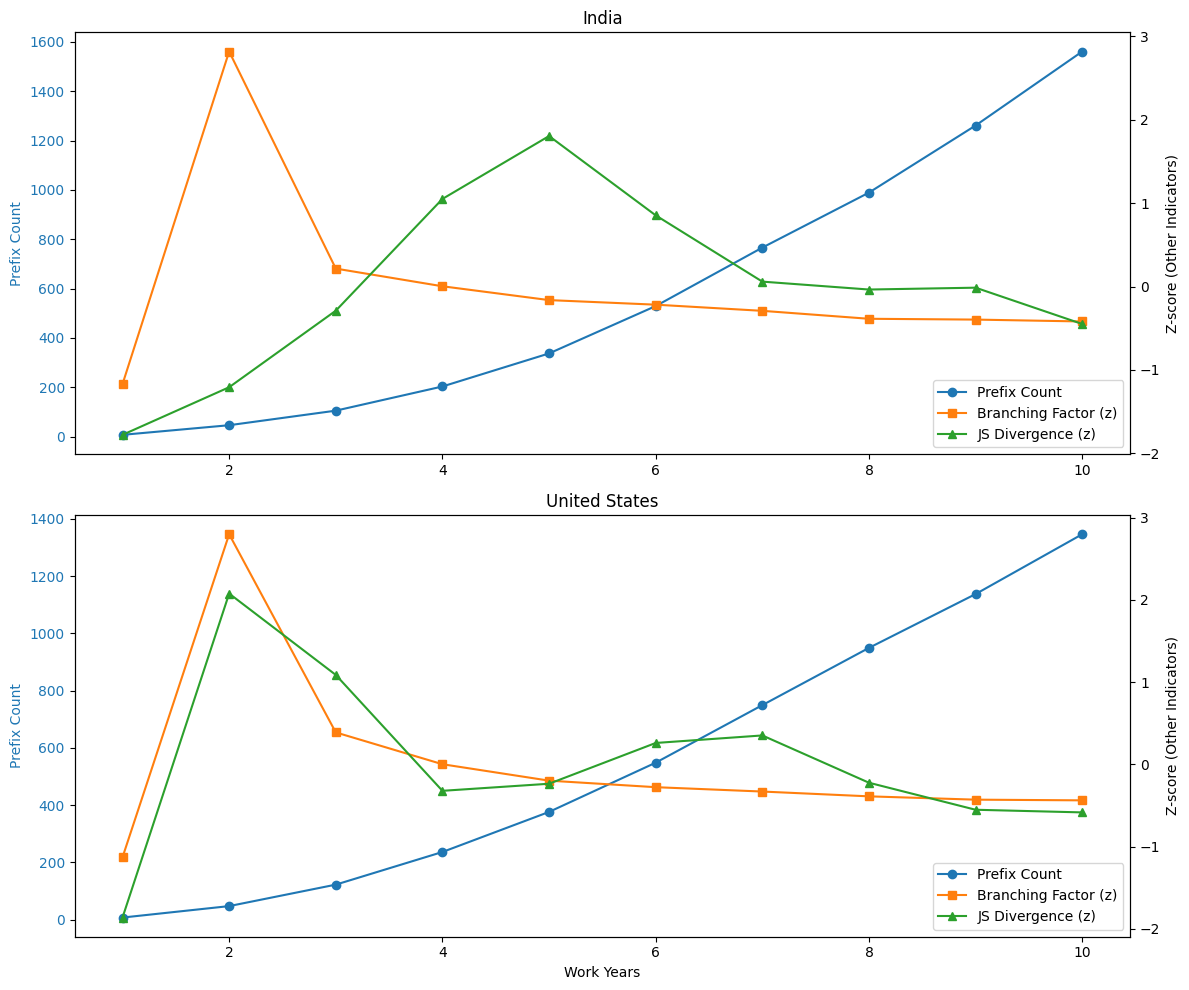

✅ 已生成带有自定义标题的对比图


<Figure size 640x480 with 0 Axes>

In [6]:
# 演示自定义子图标题功能
# 使用完全自定义的标题

# 准备两组数据
custom_groups_data = {
    "IND": {
        "prefix_counts": india_prefix_counts,
        "branching_factors": india_branching_factors,
        "js_scores": india_js_scores
    },
    "USA": {
        "prefix_counts": us_prefix_counts,
        "branching_factors": us_branching_factors,
        "js_scores": us_js_scores
    }
}

# 使用自定义子图标题
plot_system_indicators_multiple_comparison(
    groups_data=custom_groups_data,
    group_names=["India", "United States"],  # 这个仅用于默认标题格式，当有subplot_titles时会被覆盖
    subplot_titles=[
        "India", 
        "United States"
    ],  # 完全自定义的子图标题
    x_values=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  # 可以是年份、时期等
    x_label="Work Years",  # 自定义x轴标签
    legend_loc='lower right',  # 图例位置
    save_as="prefix_system_indicators_comparison"
)

print("✅ 已生成带有自定义标题的对比图")


In [7]:
# ------------------------
# Step 4: 计算个体层指标
# ------------------------

# 赋值回 dataframe
india_df["diverged"] = india_model.compute_diverged()
india_df["first_divergence_year"] = india_model.compute_first_divergence_year()
india_df["prefix_rarity_score"] = india_model.compute_prefix_rarity_score()
india_df["path_uniqueness"] = india_model.compute_path_uniqueness()

us_df["diverged"] = us_model.compute_diverged()
us_df["first_divergence_year"] = us_model.compute_first_divergence_year()
us_df["prefix_rarity_score"] = us_model.compute_prefix_rarity_score()
us_df["path_uniqueness"] = us_model.compute_path_uniqueness()

# 合并回总数据
df = pd.concat([india_df, us_df], ignore_index=True)

In [8]:
df

,worker_id,gender,country,cohort,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,diverged,first_divergence_year,prefix_rarity_score,path_uniqueness
0,dilip-kumar-nath-7538746a,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,7.070030,0
1,vinodkumar-yadav-b7a976107,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,7.070030,0
2,josh-slosson-07a1509,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,7.070030,0
3,jonatthan-rodriguez-8a5612121,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,7.070030,0
4,jeenesh-jyothindran-8ba28818,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,7.070030,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38897,nan-jiang-743a9863,female,us,0-10 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,4.528812,0
38898,tina-pava-4846207,female,us,21-30 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,4.528812,0
38899,sariandoni,female,us,21-30 total work years,support & test,software,software,software,software,software,software,research,research,research,1,3.0,64.726362,3
38900,nancy-jain-a8723460,female,us,0-10 total work years,software,software,software,software,software,support & test,software,software,software,software,1,6.0,42.500654,0


First divergence Year 柱状图对比

first_divergence_year 是一个事件变量，只在 diverged == 1 的个体上有意义，因此在 diverged == 0 的行中为 NaN 是完全合理的。

为了避免图像误导或报错，我们在可视化时应该：

* 仅绘制非 NaN 的 divergence_year

* 并区分国家以便对比

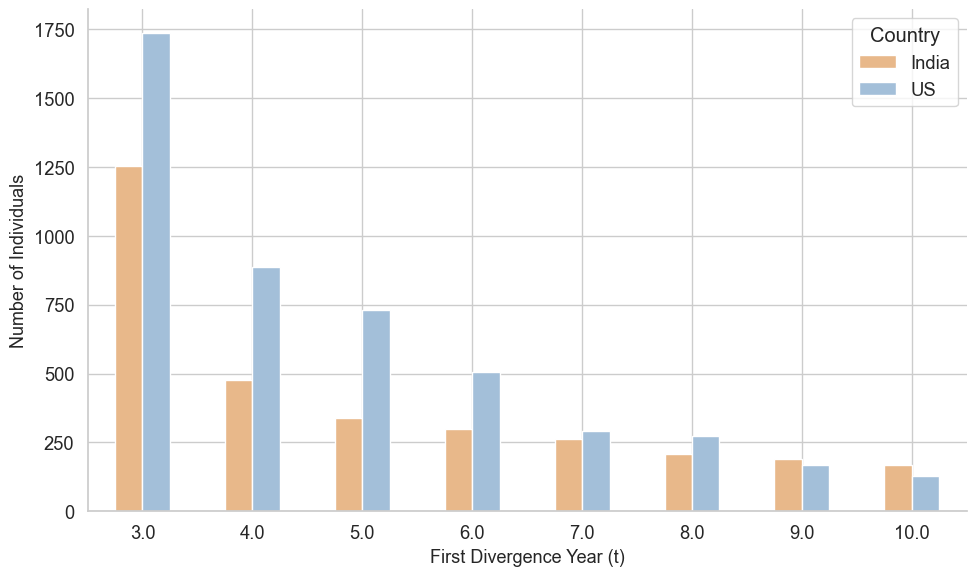

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 只保留 diverged 个体
diverged_df = df[df["diverged"] == 1].copy()

# 分国家计数
vc_divergence = diverged_df.groupby("country")["first_divergence_year"].value_counts().unstack().fillna(0).T

# 重命名列为想要的图例标签
vc_divergence = vc_divergence.rename(columns={"india": "India", "us": "US"})

# 设置画布
sns.set(style="whitegrid", font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 6))

india_color = "#E8B88A"
us_color = "#A3BFD9"

# 绘图（堆叠或并排任选），莫奈柔色调
vc_divergence.plot(
    kind="bar",
    ax=ax,
    color=[india_color, us_color]  # Monet-style: India / US
    # color=["#A6C1A9", "#C6A5CF"], # 薰衣草搭配颜色
)

# 设置标题与标签
# ax.set_title("Divergence Year Distribution by Country", fontsize=16)
ax.set_xlabel("First Divergence Year (t)", fontsize=13)
ax.set_ylabel("Number of Individuals", fontsize=13)
plt.xticks(rotation=0)
plt.legend(title="Country")
sns.despine()
plt.tight_layout()
plt.savefig("First Divergence Year Distribution by Country", 
            dpi=300, 
            bbox_inches='tight')
plt.show()

Prefix Rarity Score 分布 KDE 对比

先对 prefix rarity score 做 z-score 标准化，然后在图中画出 z = 1.5 对应的位置（即：标准化后的值为 1.5 的位置，在原始数据中的对应值）。

步骤逻辑：
1. 计算每组 prefix rarity score 的整体均值与标准差；
2. 使用这些参数把整个数据 z-score 标准化；
3. 计算 z = 1.5 对应的原始值；
4. 在原图中加一条竖线显示这个阈值位置。

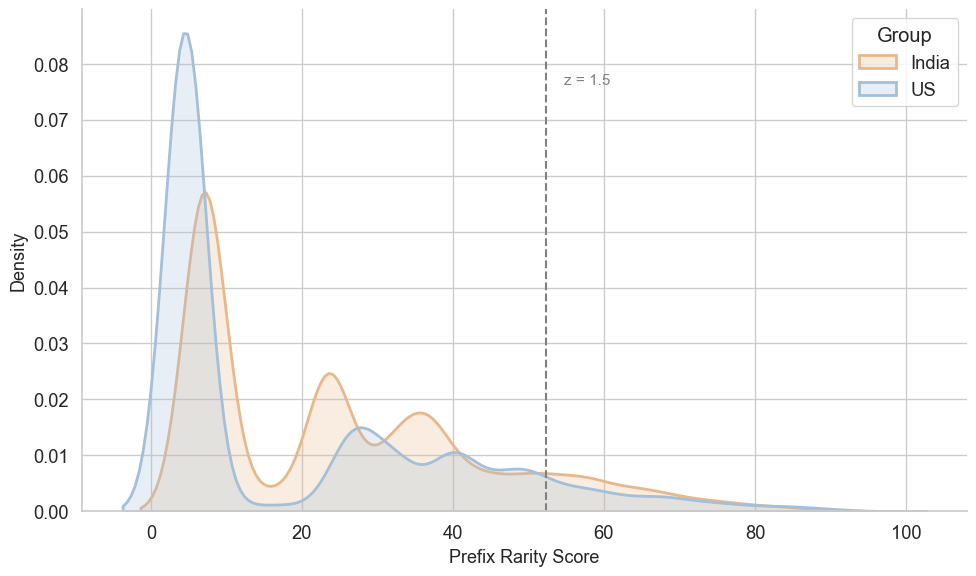

📊 统计信息: {'mean': 21.758999842691928, 'std': 20.370214118851933, 'threshold_value': 52.31432102096983, 'z_threshold': 1.5}


In [10]:
# 🎉 使用新的通用可视化函数！
# 演示 plot_prefix_rarity_distribution 的各种用法

# 首先重新导入以获取新函数
from sequenzo import plot_prefix_rarity_distribution

# 示例1：多组对比，带阈值线（你现在正在使用的效果）
data_dict = {
    "India": india_df["prefix_rarity_score"].tolist(),
    "US": us_df["prefix_rarity_score"].tolist()
}

stats = plot_prefix_rarity_distribution(
    data=data_dict,
    colors={"India": "#E8B88A", "US": "#A3BFD9"},
    show_threshold=True,
    z_threshold=1.5,
    save_as="rarity_distribution_with_threshold"
)

print("📊 统计信息:", stats)


示例2：不显示阈值线


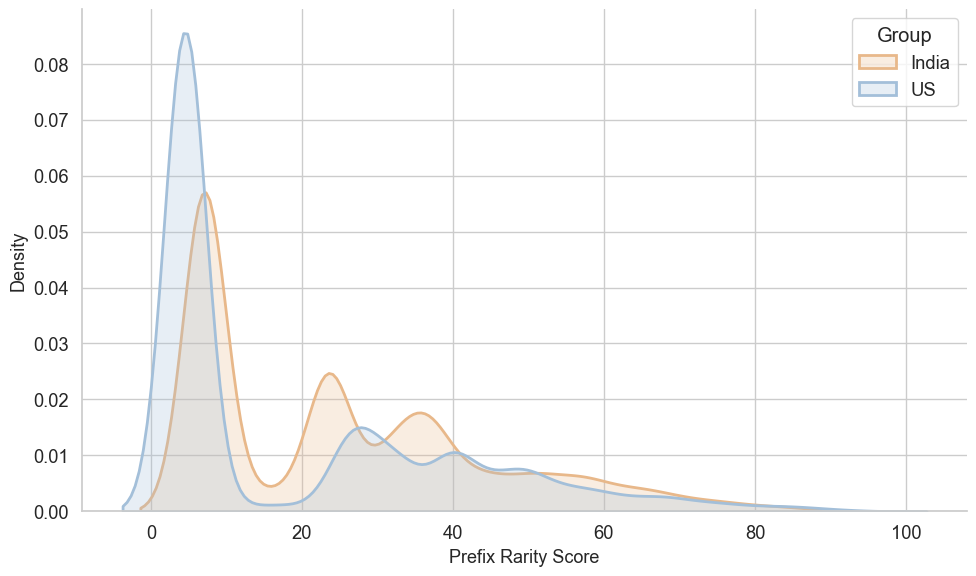


示例3：单组分析（仅印度）


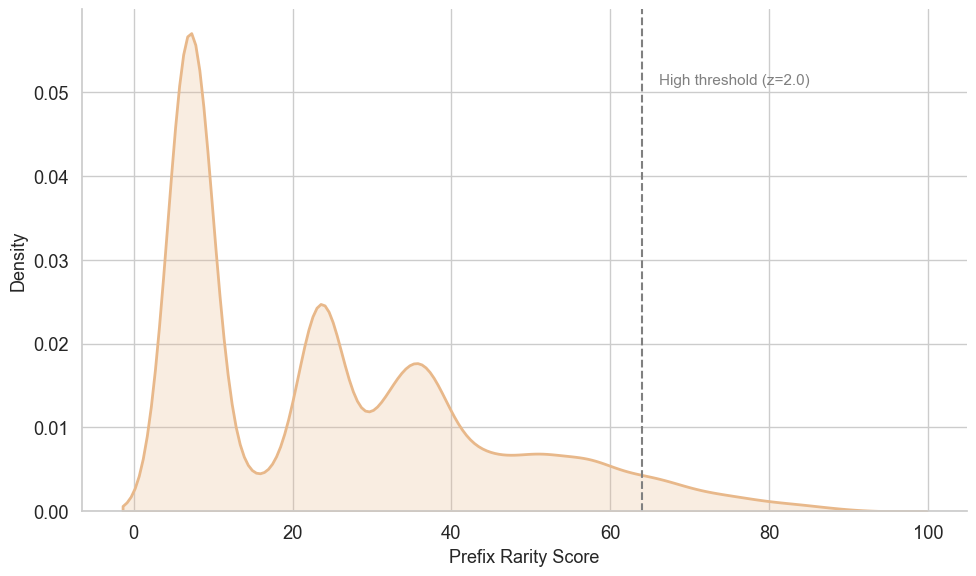


示例4：演示三组对比的可能性


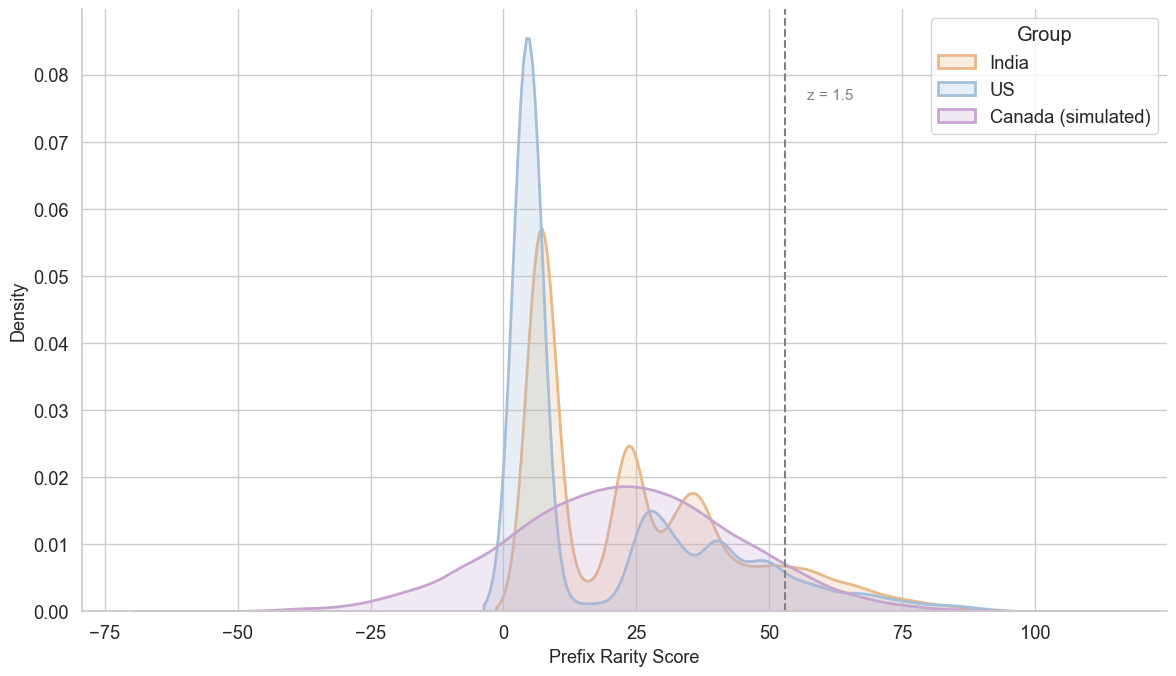

✅ 所有示例完成！


In [11]:
# 示例2：无阈值线，简洁对比
print("示例2：不显示阈值线")
plot_prefix_rarity_distribution(
    data=data_dict,
    colors={"India": "#E8B88A", "US": "#A3BFD9"},
    show_threshold=False,  # 关闭阈值线
    # save_as="rarity_distribution_clean"
)

# 示例3：单组分析
print("\n示例3：单组分析（仅印度）")
plot_prefix_rarity_distribution(
    data=india_df["prefix_rarity_score"].tolist(),
    group_names=["India"],
    colors=["#E8B88A"],
    show_threshold=True,
    z_threshold=2.0,  # 不同的阈值
    threshold_label="High threshold (z=2.0)",  # 自定义标签
    # save_as="india_only_analysis"
)

# 示例4：三组对比（如果有第三个国家的数据）
print("\n示例4：演示三组对比的可能性")
# 这里用模拟数据演示
import numpy as np
np.random.seed(42)
simulated_canada = np.random.normal(
    loc=np.mean(india_df["prefix_rarity_score"]) * 0.9, 
    scale=np.std(india_df["prefix_rarity_score"]) * 1.1, 
    size=len(india_df)
)

three_groups = {
    "India": india_df["prefix_rarity_score"].tolist(),
    "US": us_df["prefix_rarity_score"].tolist(),
    "Canada (simulated)": simulated_canada.tolist()
}

plot_prefix_rarity_distribution(
    data=three_groups,
    show_threshold=True,
    z_threshold=1.5,
    figsize=(12, 7),  # 稍大的图
    # save_as="three_countries_comparison"
)

print("✅ 所有示例完成！")


Path Uniqueness 箱线图 + Strip（展示极端个体）

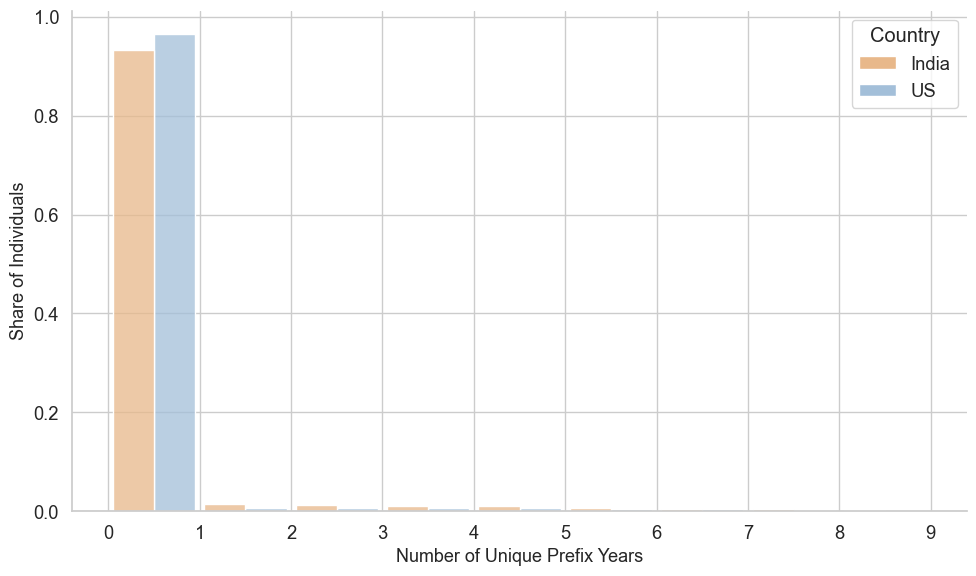

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置风格与字体比例（和前图一致）
sns.set(style="whitegrid", font_scale=1.2)

# 设置颜色（莫奈柔色调）
india_color = "#E8B88A"
us_color = "#A3BFD9"
palette = {"India": india_color, "US": us_color}

# 确保国家字段是大写标签（与图例一致）
df["country"] = df["country"].str.strip().str.title().replace({"Us": "US", "India": "India"})

# 创建画布
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(
    data=df,
    x="path_uniqueness",
    hue="country",
    multiple="dodge",
    binwidth=1,
    shrink=0.9,
    palette=palette,
    stat="probability",    # 👈 显示 share 而不是 density
    common_norm=False,     # 👈 每组单独归一化
    ax=ax
)

# 手动修复 legend
from matplotlib.patches import Patch

custom_legend = [
    Patch(facecolor="#E8B88A", label="India"),
    Patch(facecolor="#A3BFD9", label="US")
]
ax.legend(handles=custom_legend, title="Country")

# 设置标签与样式
ax.set_xlabel("Number of Unique Prefix Years", fontsize=13)
ax.set_ylabel("Share of Individuals", fontsize=13)
# ax.set_title("Distribution of Path Uniqueness by Country", fontsize=15)
ax.set_xticks(range(0, df["path_uniqueness"].max() + 1))
# plt.legend(title="Country")
sns.despine()
plt.tight_layout()

# 保存 & 显示
plt.savefig("Path Uniqueness Distribution by Country", dpi=300, bbox_inches='tight')
plt.show()


In [13]:
for country in ['India', 'US']:
    
    country_df = df[df['country']==country]
    
    print(f'{country} - full sample size, {country_df.shape[0]}')
    
    print(country)

    print(country_df['diverged'].value_counts())

India - full sample size, 15113
India
diverged
0    11921
1     3192
Name: count, dtype: int64
US - full sample size, 23789
US
diverged
0    19066
1     4723
Name: count, dtype: int64


示例1：整体相关性分析


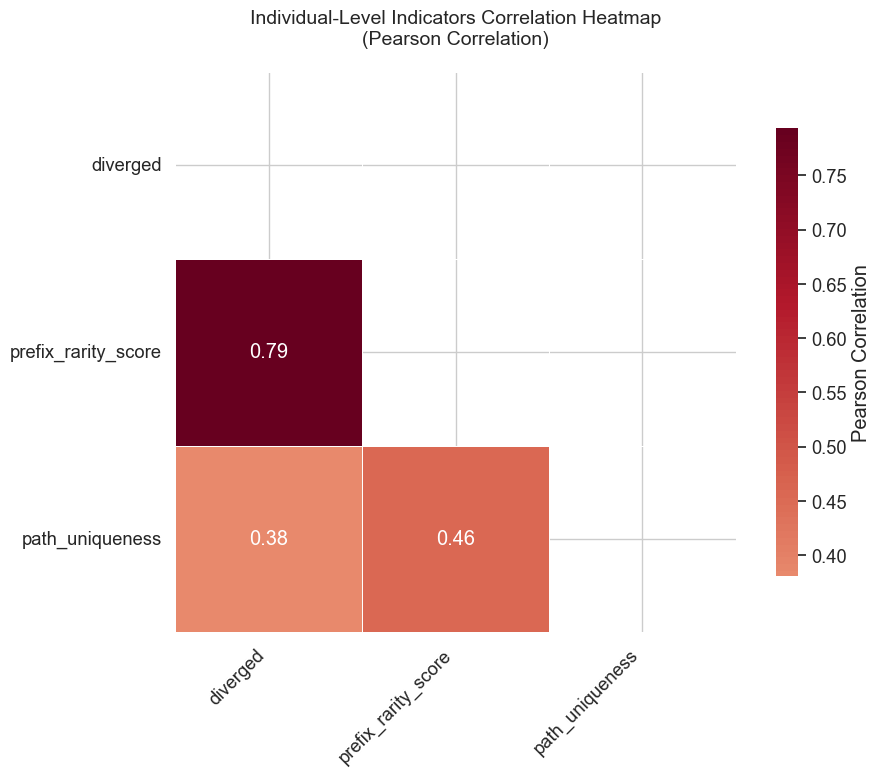

📊 检测到的指标: ['diverged', 'prefix_rarity_score', 'path_uniqueness']
📊 样本大小: 38902


In [14]:
# 🔥 新功能：个体层指标相关性热力图！
# 演示 plot_individual_indicators_correlation 的各种用法

from sequenzo import plot_individual_indicators_correlation

# 示例1：整体相关性热力图（所有个体）
print("示例1：整体相关性分析")
corr_results = plot_individual_indicators_correlation(
    df,
    save_as="overall_indicators_correlation"
)

print("📊 检测到的指标:", corr_results['summary']['indicators_included'])
print("📊 样本大小:", corr_results['summary']['sample_size'])



示例2：按国家分组的相关性分析


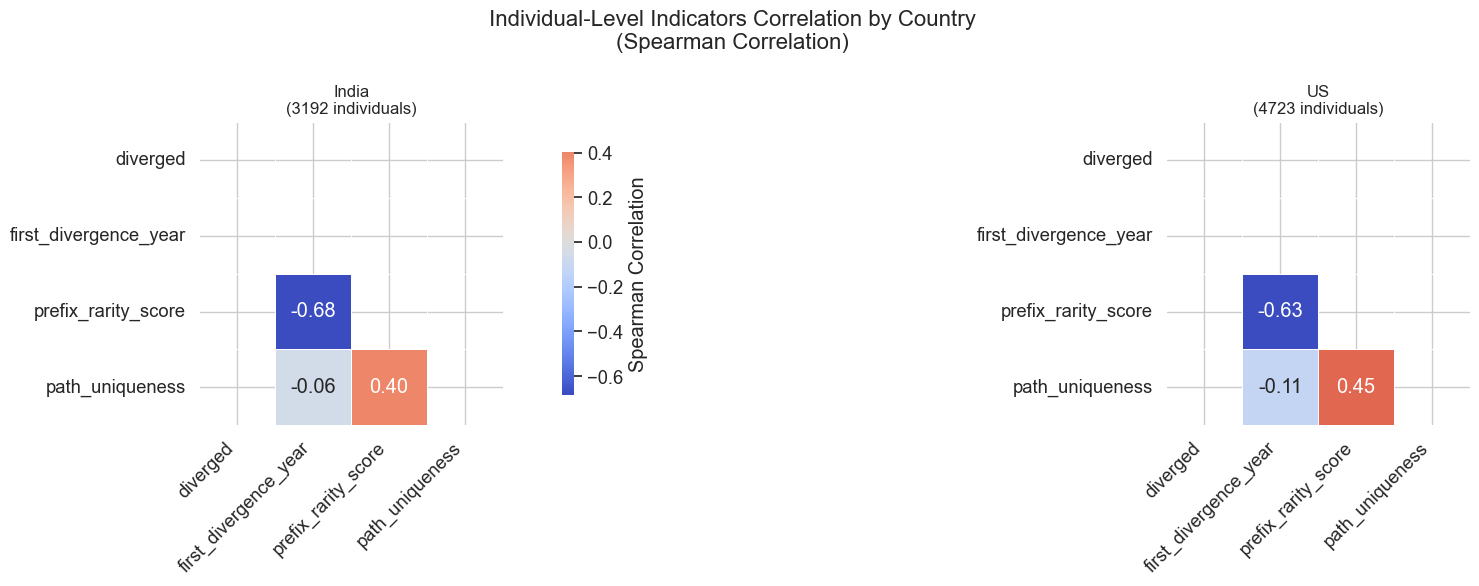

📊 各国样本大小: {'India': 3192, 'US': 4723}

示例3：只分析核心指标


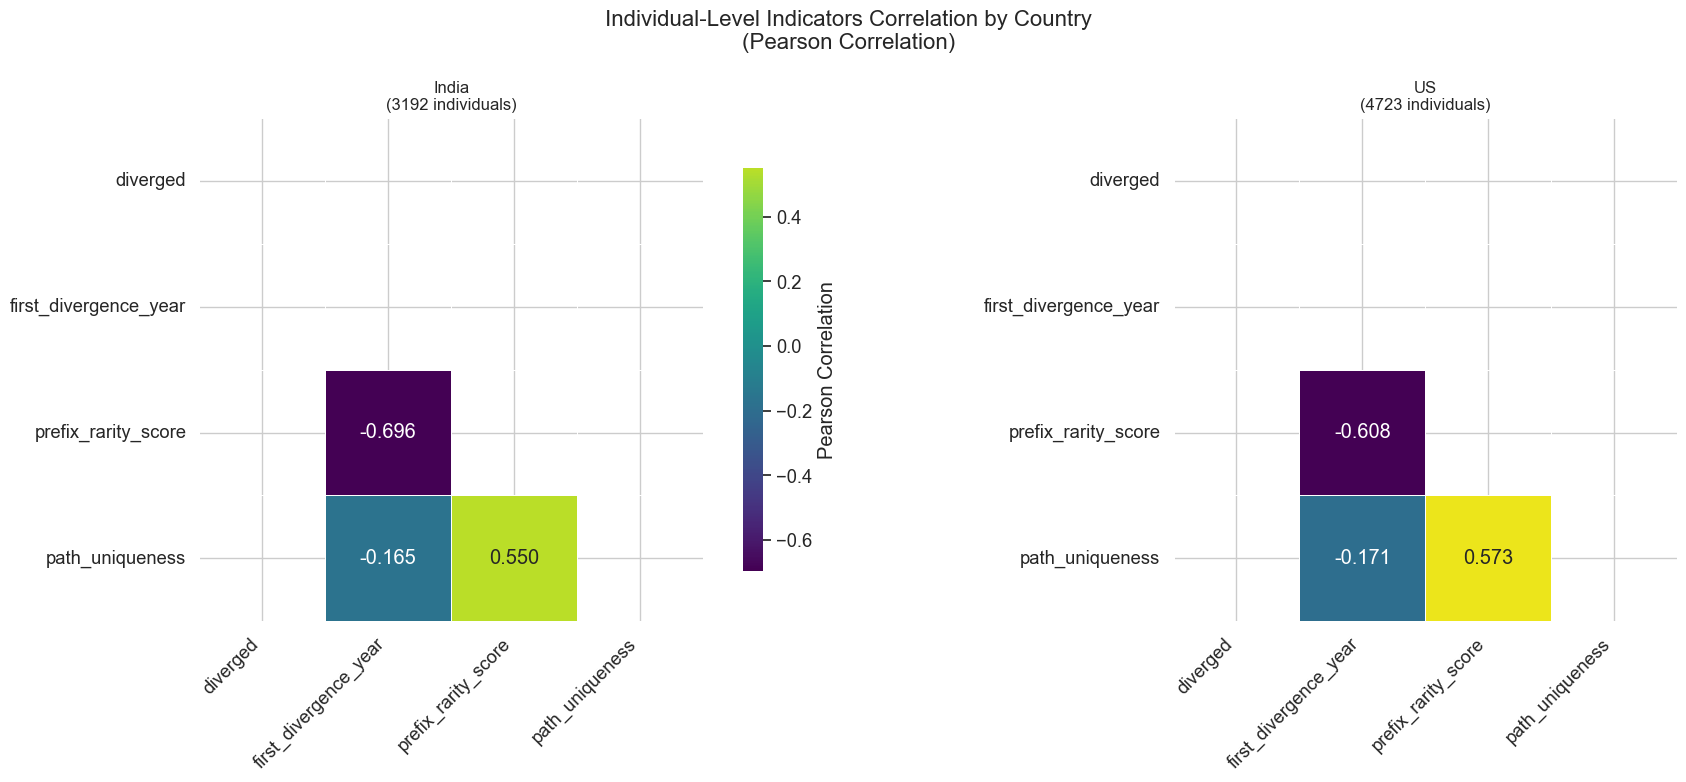


示例4：学术发表级别的美观热力图


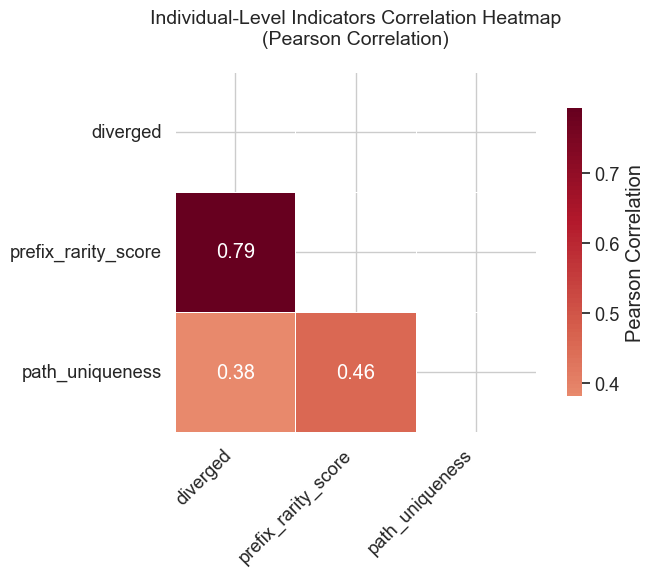

✅ 所有相关性分析完成！


In [15]:
# 示例2：按国家分组的相关性对比（最重要的用法！）
print("\n示例2：按国家分组的相关性分析")
country_corr_results = plot_individual_indicators_correlation(
    df,
    group_column='country',  # 按国家分组
    correlation_method='spearman',  # 使用Spearman相关系数（对非正态分布更鲁棒）
    cmap='coolwarm',  # 使用冷暖配色
    figsize=(12, 6),  # 更宽的图像以容纳两个子图
    save_as="country_indicators_correlation"
)

print("📊 各国样本大小:", country_corr_results['summary']['sample_size'])

# 示例3：自定义指标选择
print("\n示例3：只分析核心指标")
core_indicators = ['diverged', 'first_divergence_year', 'prefix_rarity_score', 'path_uniqueness']
core_corr_results = plot_individual_indicators_correlation(
    df,
    indicator_columns=core_indicators,
    group_column='country',
    cmap='viridis',  # 使用科学配色
    annot=True,
    fmt='.3f',  # 显示3位小数
    save_as="core_indicators_correlation"
)

# 示例4：高端美学版本（学术发表级别）
print("\n示例4：学术发表级别的美观热力图")
academic_corr = plot_individual_indicators_correlation(
    df,
    indicator_columns=core_indicators,
    correlation_method='pearson',
    cmap='RdBu_r',  # 经典的红蓝配色
    center=0,  # 以0为中心
    annot=True,
    fmt='.2f',
    figsize=(8, 6),
    save_as="academic_correlation_heatmap"
)

print("✅ 所有相关性分析完成！")


## 🎨 `plot_individual_indicators_correlation` 功能说明

### 🎯 核心功能
这个函数可以创建**个体层指标之间的相关性热力图**，帮助你理解不同指标之间的关系模式。

### 📊 主要特性

#### **1. 智能指标检测**
- 自动识别常见的个体层指标（`diverged`, `prefix_rarity_score`, `path_uniqueness` 等）
- 支持手动指定指标列表

#### **2. 分组对比分析**
- **整体分析**：所有个体的整体相关性
- **分组对比**：按国家、性别等变量分组比较

#### **3. 多种相关系数**
- `pearson`：线性相关（默认）
- `spearman`：秩相关（对异常值鲁棒）
- `kendall`：非参数相关

#### **4. 美观的可视化**
- 多种配色方案：`RdBu_r`（红蓝）、`coolwarm`、`viridis`、`plasma`
- 上三角遮罩（避免重复信息）
- 可选的数值标注
- 学术发表级别的美观度

#### **5. 实用功能**
- 自动处理缺失值
- 返回相关系数矩阵供进一步分析
- 支持保存高分辨率图像
- 提供详细的统计摘要

### 🔥 推荐用法

```python
# 最实用：按国家分组对比
plot_individual_indicators_correlation(
    df, 
    group_column='country',
    correlation_method='spearman',
    save_as="country_comparison"
)

# 学术发表：选择核心指标
plot_individual_indicators_correlation(
    df,
    indicator_columns=['diverged', 'prefix_rarity_score', 'path_uniqueness'],
    cmap='RdBu_r',
    save_as="core_indicators"
)
```

### 📈 分析意义
- **正相关**：指标同向变化（如分歧个体通常有更高的稀有性分数）
- **负相关**：指标反向变化
- **分组差异**：不同国家/群体的指标关系模式差异


In [16]:
df.rename(columns={f"C{i}": str(i) for i in range(1, 11)}, inplace=True)

In [ ]:
# 🔍 逐步调试 DataFrame 合并问题 - 找出为什么 df 是空的
print("=== 🕵️ 调试开始 ===")

# 1. 检查主数据文件
print("📁 检查主数据文件 df.csv...")
try:
    df_main = pd.read_csv("df.csv")
    print(f"✅ df_main 读取成功")
    print(f"📊 df_main 形状: {df_main.shape}")
    print(f"🔑 df_main 列名前10个: {list(df_main.columns)[:10]}")
    
    if 'worker_id' in df_main.columns:
        print(f"🆔 df_main 中 worker_id 的唯一值数量: {df_main['worker_id'].nunique()}")
        print(f"📊 df_main worker_id 样例: {df_main['worker_id'].head().tolist()}")
        print(f"🔍 df_main worker_id 数据类型: {df_main['worker_id'].dtype}")
    else:
        print("❌ df_main 中没有 worker_id 列！")
        
    if 'country' in df_main.columns:
        print(f"🌍 df_main 中的 country 唯一值: {df_main['country'].unique()}")
    else:
        print("❌ df_main 中没有 country 列！")
        
except Exception as e:
    print(f"❌ 读取 df_main 失败: {e}")
    df_main = None

print("\\n" + "="*50)

# 2. 检查控制变量文件
print("📁 检查控制变量文件...")
try:
    controls = pd.read_csv("/Users/lei/Library/CloudStorage/OneDrive-Nexus365/yuqi_dphil/data/occupational_segregation_paper/cleaned_data/df_final_encoded_categorical_levels.csv")
    print(f"✅ controls 读取成功")
    print(f"📊 controls 形状: {controls.shape}")
    print(f"🔑 controls 列名前10个: {list(controls.columns)[:10]}")
    
    # 重命名列
    controls.rename(columns={f"C{i}": str(i) for i in range(1, 11)}, inplace=True)
    
    # 清理控制变量
    controls = controls.drop(columns=["organization_type", "num_followers", "industry"], errors="ignore")
    print(f"📊 清理后 controls 形状: {controls.shape}")
    
    if 'worker_id' in controls.columns:
        print(f"🆔 controls 中 worker_id 的唯一值数量: {controls['worker_id'].nunique()}")
        print(f"📊 controls worker_id 样例: {controls['worker_id'].head().tolist()}")
        print(f"🔍 controls worker_id 数据类型: {controls['worker_id'].dtype}")
    else:
        print("❌ controls 中没有 worker_id 列！")
        
except Exception as e:
    print(f"❌ 读取 controls 失败: {e}")
    controls = None

print("\\n" + "="*50)


In [ ]:
# 3. 检查合并过程
if df_main is not None and controls is not None and 'worker_id' in df_main.columns and 'worker_id' in controls.columns:
    print("🔗 检查两个数据集的交集...")
    
    # 检查共同的 worker_id
    df_main_ids = set(df_main['worker_id'].dropna())
    controls_ids = set(controls['worker_id'].dropna())
    common_ids = df_main_ids.intersection(controls_ids)
    
    print(f"📊 df_main 中的 worker_id 数量: {len(df_main_ids)}")
    print(f"📊 controls 中的 worker_id 数量: {len(controls_ids)}")
    print(f"🔗 共同的 worker_id 数量: {len(common_ids)}")
    
    if len(common_ids) == 0:
        print("❌ 没有共同的 worker_id！这就是问题所在！")
        print("\\n🔍 进一步分析:")
        print(f"📋 df_main worker_id 前5个: {list(df_main_ids)[:5]}")
        print(f"📋 controls worker_id 前5个: {list(controls_ids)[:5]}")
        
        # 检查数据格式差异
        if len(df_main_ids) > 0 and len(controls_ids) > 0:
            sample_main = list(df_main_ids)[0]
            sample_controls = list(controls_ids)[0]
            print(f"\\n🔍 数据格式比较:")
            print(f"df_main 样例: '{sample_main}' (类型: {type(sample_main)})")
            print(f"controls 样例: '{sample_controls}' (类型: {type(sample_controls)})")
    else:
        print(f"✅ 找到 {len(common_ids)} 个共同的 worker_id")
        
        # 执行合并
        print("\\n🔄 执行合并...")
        df_merged = df_main.merge(controls, on="worker_id", how="inner")
        print(f"✅ 合并后形状: {df_merged.shape}")
        
        if df_merged.shape[0] > 0:
            # 检查国家过滤
            if 'country' in df_merged.columns:
                print(f"\\n🌍 合并后的 country 唯一值: {df_merged['country'].unique()}")
                df_filtered = df_merged[df_merged["country"].isin(["india", "us"])].copy()
                print(f"🎯 国家过滤后形状: {df_filtered.shape}")
                
                if df_filtered.shape[0] == 0:
                    print("❌ 国家过滤后为空！可能country列的值不是 'india' 或 'us'")
                else:
                    print(f"✅ 最终数据集形状: {df_filtered.shape}")
                    print(f"📊 最终列名: {list(df_filtered.columns)}")
            else:
                print("❌ 合并后的数据中没有 country 列！")
        else:
            print("❌ 合并后为空！")
else:
    print("❌ 无法进行合并检查，因为数据读取失败或缺少必要的列")

print("\\n=== 🕵️ 调试结束 ===")
print("\\n💡 解决建议:")
print("1. 如果没有共同的 worker_id，检查两个文件中的 worker_id 格式是否一致")
print("2. 如果 country 值不匹配，检查 country 列的实际值")
print("3. 确认两个 CSV 文件路径是否正确且文件存在")


In [17]:
df

,worker_id,gender,country,cohort,1,2,3,4,5,6,7,8,9,10,diverged,first_divergence_year,prefix_rarity_score,path_uniqueness
0,dilip-kumar-nath-7538746a,male,India,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,7.070030,0
1,vinodkumar-yadav-b7a976107,male,India,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,7.070030,0
2,josh-slosson-07a1509,male,India,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,7.070030,0
3,jonatthan-rodriguez-8a5612121,male,India,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,7.070030,0
4,jeenesh-jyothindran-8ba28818,male,India,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,7.070030,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38897,nan-jiang-743a9863,female,US,0-10 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,4.528812,0
38898,tina-pava-4846207,female,US,21-30 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,4.528812,0
38899,sariandoni,female,US,21-30 total work years,support & test,software,software,software,software,software,software,research,research,research,1,3.0,64.726362,3
38900,nancy-jain-a8723460,female,US,0-10 total work years,software,software,software,software,software,support & test,software,software,software,software,1,6.0,42.500654,0


In [18]:
df.to_csv('df.csv', index=False)

-------------India-------------

[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 15113
[>] Number of time points: 10
[>] Min/Max sequence length: 10 / 10
[>] States: ['data', 'data & intensive math', 'hardware', 'research', 'software', 'software & hardware', 'support & test']
[>] Labels: ['data', 'data & intensive math', 'hardware', 'research', 'software', 'software & hardware', 'support & test']


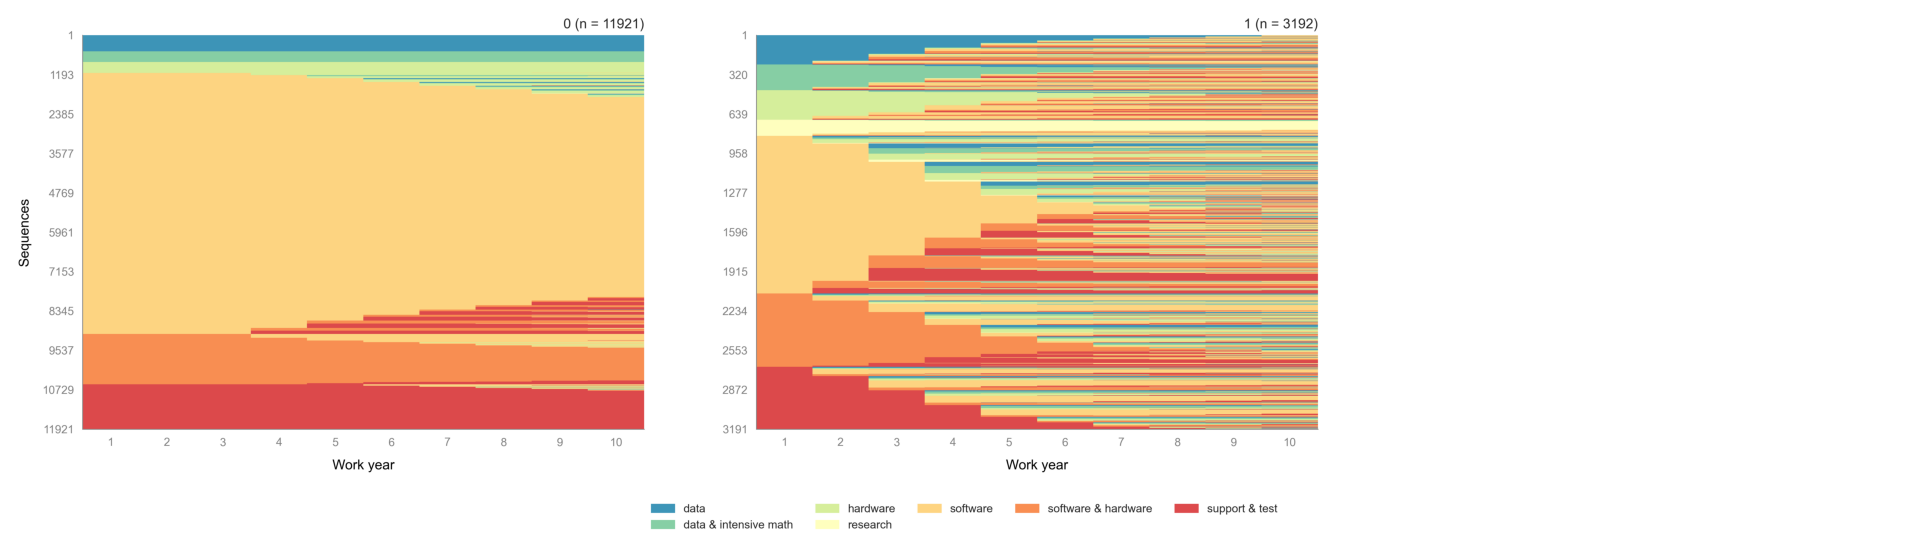

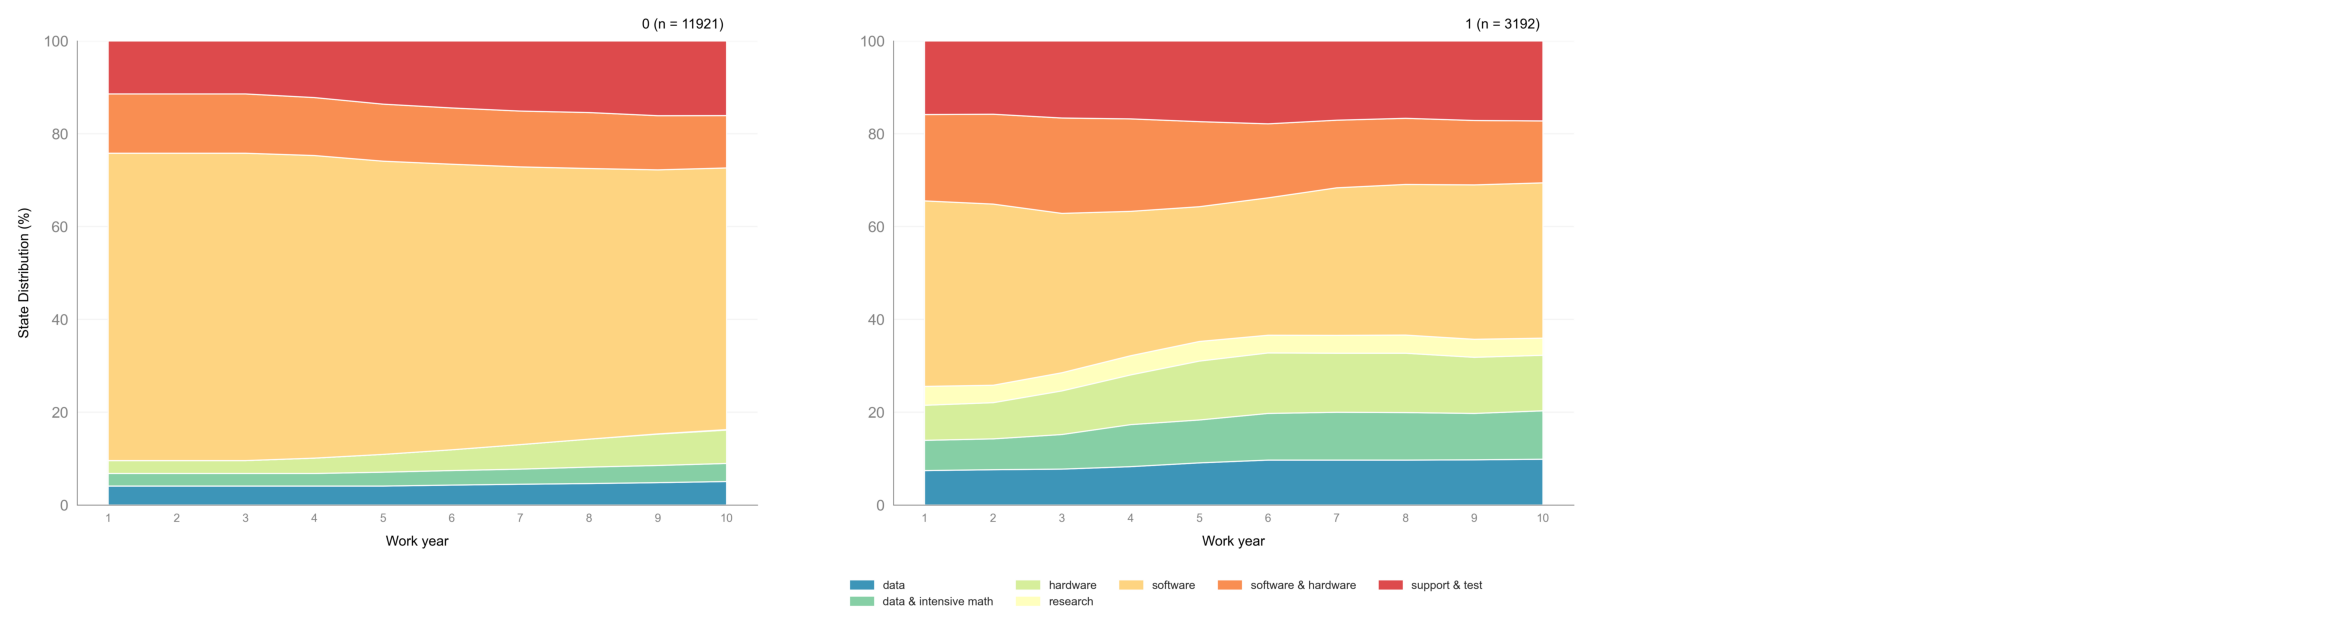

-------------US-------------

[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 23789
[>] Number of time points: 10
[>] Min/Max sequence length: 10 / 10
[>] States: ['data', 'data & intensive math', 'hardware', 'research', 'software', 'software & hardware', 'support & test']
[>] Labels: ['data', 'data & intensive math', 'hardware', 'research', 'software', 'software & hardware', 'support & test']


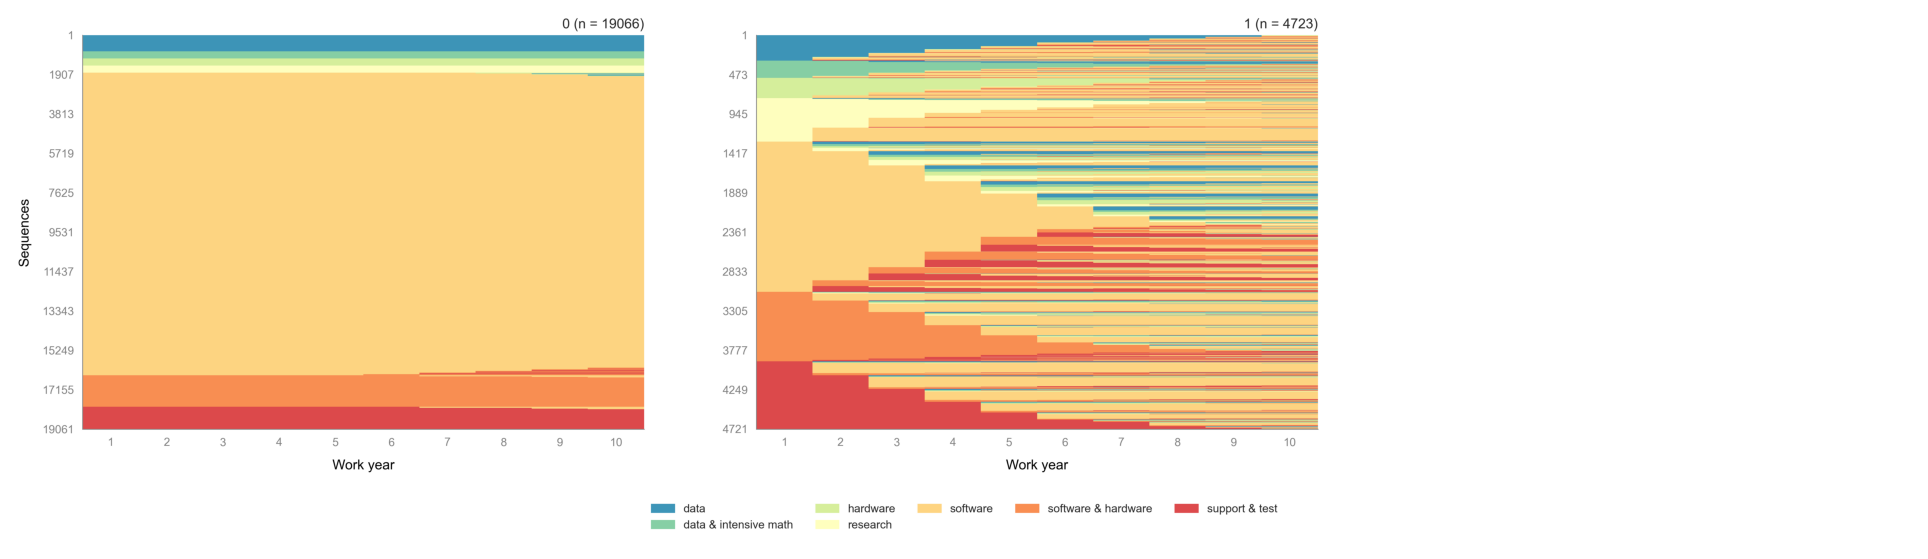

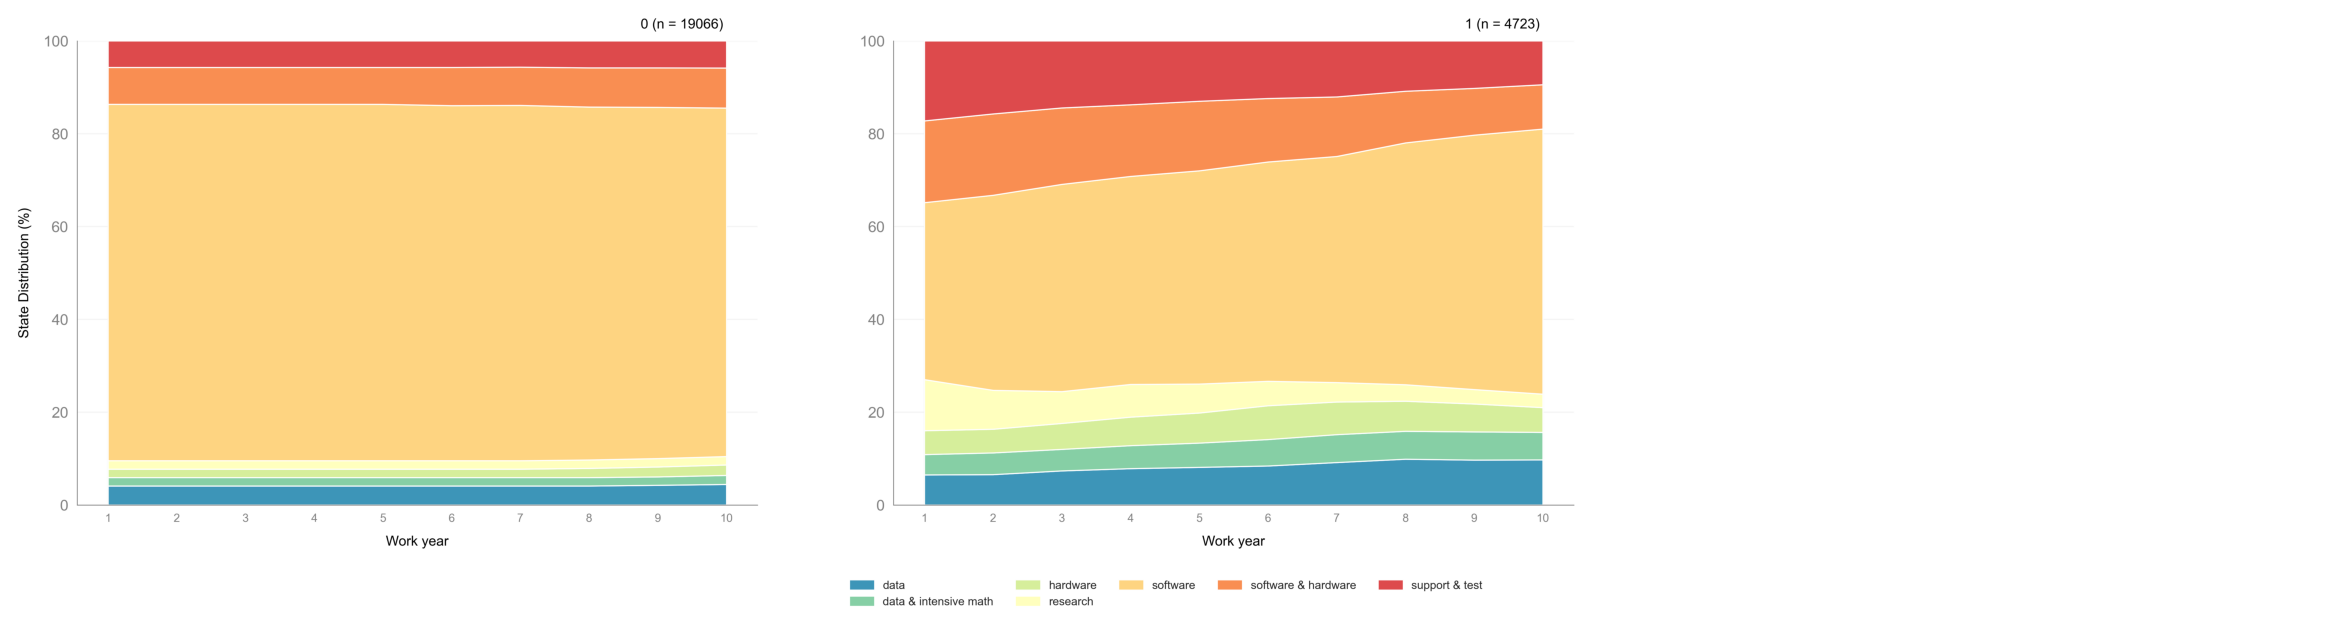

In [19]:
def by_country_plotting_sequences(country_name, country_dataframe):
    from sequenzo import SequenceData
    from sequenzo.visualization import plot_sequence_index
    
    time_cols = [str(i) for i in range(1, 11)]
    state_list = sorted(country_dataframe[time_cols].stack().dropna().unique().tolist())  # e.g. ['data', 'hardware', ...]
    
    seq = SequenceData(
        data=country_dataframe,
        id_col="worker_id",
        time=time_cols,
        states=state_list,
        time_type="year",
    )
    
    plot_sequence_index(
        seqdata=seq,
        id_group_df=country_dataframe,
        categories="diverged",
        # title="Sequence Index Plot: Diverged vs Mainstream Paths",
        # sort_by="transition_count",  # 可选排序方式
        save_as=f"{country_name}_diverged_vs_mainstream_index_plot.png",
        dpi=300,
        xlabel="Work year"
    )
    
    plot_state_distribution(
        seqdata=seq,
        id_group_df=country_dataframe,
        categories="diverged",
        # title="Sequence Index Plot: Diverged vs Mainstream Paths",
        # sort_by="transition_count",  # 可选排序方式
        save_as=f"{country_name}_diverged_vs_mainstream_state_distribution_plot.png",
        dpi=300,
        xlabel="Work year"
    )


for country in ['India', 'US']:
    print(f'-------------{country}-------------')
    country_df = df[df['country'] == country]
    by_country_plotting_sequences(country, country_df)
    

In [26]:
import pandas as pd
import statsmodels.formula.api as smf

# 文件路径
df_main = pd.read_csv("df.csv")  # 包含 divergence 指标
controls = pd.read_csv("/Users/lei/Library/CloudStorage/OneDrive-Nexus365/yuqi_dphil/data/occupational_segregation_paper/cleaned_data/df_final_encoded_categorical_levels.csv",
                       index_col=0)

# 清理控制变量
controls = controls.drop(columns=["organization_type", "num_followers", "industry", "company_size"], errors="ignore")

# 合并主表 + 控制变量
df = df_main.merge(controls, on="worker_id", how="inner")

# df
# 清理与转换
# df = df[df["country"].isin(["india", "us"])].copy()
df["gender"] = df["gender"].astype("category")
df["cohort"] = df["cohort"].astype("category")
df["country"] = df["country"].astype("category")

# 教育分类合并
df["highest_educational_degree"] = df["highest_educational_degree"].replace(
    {"PhD": "Advanced Degree", "Master": "Advanced Degree"}
)

df

,worker_id,gender,country,cohort,1,2,3,4,5,6,...,diverged,first_divergence_year,prefix_rarity_score,path_uniqueness,highest_educational_degree,whether_bachelor_university_prestigious,internationalization,highest_seniority_level,work_years,simplified_company_size
0,dilip-kumar-nath-7538746a,male,India,11-20 total work years,software,software,software,software,software,software,...,0,NaN,7.070030,0,Bachelor,False,Multinational,Senior,15.250,Large (500+ employees)
1,vinodkumar-yadav-b7a976107,male,India,11-20 total work years,software,software,software,software,software,software,...,0,NaN,7.070030,0,Bachelor,False,Local,Normal,11.500,Large (500+ employees)
2,josh-slosson-07a1509,male,India,11-20 total work years,software,software,software,software,software,software,...,0,NaN,7.070030,0,Bachelor,False,International,Normal,18.417,Small (11-50 employees)
3,jonatthan-rodriguez-8a5612121,male,India,11-20 total work years,software,software,software,software,software,software,...,0,NaN,7.070030,0,Bachelor,False,Multinational,Senior,11.917,Large (500+ employees)
4,jeenesh-jyothindran-8ba28818,male,India,11-20 total work years,software,software,software,software,software,software,...,0,NaN,7.070030,0,Bachelor,False,Multinational,Senior,13.083,Large (500+ employees)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32626,michelle-elder,female,US,21-30 total work years,software,software,software,software,software,software,...,0,NaN,26.687441,0,Bachelor,True,Local,Senior,25.000,Medium (51-500 employees)
32627,nan-jiang-743a9863,female,US,0-10 total work years,software,software,software,software,software,software,...,0,NaN,4.528812,0,Advanced Degree,False,Local,Normal,10.000,Large (500+ employees)
32628,tina-pava-4846207,female,US,21-30 total work years,software,software,software,software,software,software,...,0,NaN,4.528812,0,Bachelor,False,Local,Normal,26.750,Large (500+ employees)
32629,sariandoni,female,US,21-30 total work years,support & test,software,software,software,software,software,...,1,3.0,64.726362,3,Advanced Degree,False,Local,Senior,26.000,Large (500+ employees)
